<a href="https://colab.research.google.com/github/virf96/Basico/blob/main/Copia_de_OUTLIERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install stylecloud

In [ ]:
pip install unicode

In [ ]:
pip install unidecode

     |████████████████████████████████| 245kB 8.6MB/s 


In [ ]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",200)
from sklearn.datasets import load_boston

import pandas as pd
import plotly.graph_objects as go
import sys
import numpy as np
import plotly.express as px
import re
import stylecloud
import unicodedata
import nltk
import unicodedata
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from unidecode import unidecode
from nltk.corpus import stopwords
from nltk import FreqDist
from PIL import Image

In [ ]:
#Definimos función que hace una gráfica de caja
def plot_box(df,col,title,x_title,y_title):
    y=list(df[col].values)
    fig = go.Figure()
    fig.add_trace(go.Box(
        y=y,
        x=[x_title]*len(y),
        marker_color="#4d609c"
    ))

    fig.update_layout(
        yaxis_title=y_title,
        boxmode='group'
    )
    fig.update_layout(plot_bgcolor="#f8f8ff")
    fig.update_layout(title=go.layout.Title(text=title,
                                            font=go.layout.title.Font(size=30)))
    return fig

In [ ]:
#Definimos función que gráfica punto contra punto de 2 variables continuas
def scatter(df,x,y):
    fig = px.scatter(df, x=x, y=y)
    return fig

In [ ]:
#precio de las casas en boston
boston=load_boston()

In [ ]:
boston["DESCR"].split("\n")

['.. _boston_dataset:',
 '',
 'Boston house prices dataset',
 '---------------------------',
 '',
 '**Data Set Characteristics:**  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways

In [ ]:
df=pd.DataFrame(boston["data"])
df.columns=list(boston.feature_names)
df["tgt"]=pd.DataFrame(boston["target"])

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,tgt
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
#Identifiquemos los valores atípicos utilizando una técnica de visualización sencilla que es Box Plot.

## VISUALIZACION

### DIAGRAMA DE BOXPLOT

In [ ]:
#Si hay un valor atípico, se trazará como un punto en el diagrama de caja, 
#mientras que el resto de la población se agrupará y se mostrará como cajas
plot_box(df,"DIS","DIS","","")

**el gráfico anterior muestra tres puntos entre 10 y 12, estos son los valores atípicos ya que no están incluidos en el cuadro de otra observación normal.**

In [ ]:
df["DIS"].describe(percentiles=np.arange(0.1,1.1,.1))

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
10%        1.628300
20%        1.951200
30%        2.259650
40%        2.640300
50%        3.207450
60%        3.875000
70%        4.540400
80%        5.615000
90%        6.816600
100%      12.126500
max       12.126500
Name: DIS, dtype: float64

In [ ]:
df["DIS"].describe(percentiles=[.93,.95,.97,.98,.99])

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
50%        3.207450
93%        7.318825
95%        7.827800
97%        8.506605
98%        8.906700
99%        9.222770
max       12.126500
Name: DIS, dtype: float64

In [ ]:
plot_box(df,"AGE","","","")

In [ ]:
df["AGE"].describe(percentiles=np.arange(0.1,1.1,.1))

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
10%       26.950000
20%       37.800000
30%       52.400000
40%       65.400000
50%       77.500000
60%       85.900000
70%       91.800000
80%       95.600000
90%       98.800000
100%     100.000000
max      100.000000
Name: AGE, dtype: float64

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,tgt
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
plot_box(df,"ZN","","","")

In [ ]:
#Notamos que la distribución de la variable esta contraida por los valores en cero
df["ZN"].describe(percentiles=np.arange(0.1,1.1,.1))

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%        0.000000
60%        0.000000
70%        0.000000
80%       20.000000
90%       42.500000
100%     100.000000
max      100.000000
Name: ZN, dtype: float64

### DIAGRAMA DE DISPERSION

** El diagrama de dispersión es la colección de puntos que muestra valores para dos variables. Intentemos dibujar un diagrama de dispersión para dos variables de nuestro conjunto de datos de vivienda.**

In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'tgt'],
      dtype='object')

In [ ]:
#Tasa de impuesto vs proporción de acres comerciales  por ciudad

In [ ]:
scatter(df,"INDUS","TAX")

**En el gráfico anterior, podemos ver que la mayoría de los puntos de datos están agrupados en el lado inferior izquierdo, pero hay algunos puntos que están lejos de la población, como la esquina superior derecha. Estos son los valores atípicos.**

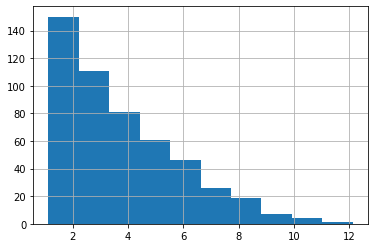

In [ ]:
df["DIS"].hist()

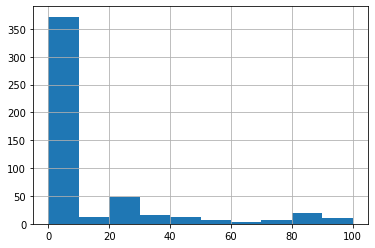

In [ ]:
df["ZN"].hist()

In [ ]:
#proporción de unidades ocupadas por sus propietarios construidas antes de 1940
#VS
#% menor estado de la población
scatter(df,"AGE","LSTAT")

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,tgt
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## MÉTODOS MATEMÁTICOS

In [ ]:
from scipy import stats

### Z-SCORE

In [ ]:
data=df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT',]]

In [ ]:
stats.zscore(data)

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [ ]:
z=np.abs(stats.zscore(data))

In [ ]:
threshold=3

In [ ]:
np.where(z>3)

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
        200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
        220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
        277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
        357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
        380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
        416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
        437, 438, 445, 450, 454, 455, 456, 457, 466]),
 array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
         1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
         5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
         3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
         0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
        11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [ ]:
data.iloc[50:58,:]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
50,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
51,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43
52,0.05360,21.0,5.64,0.0,0.439,6.511,21.1,6.8147,4.0,243.0,16.8,396.90,5.28
53,0.04981,21.0,5.64,0.0,0.439,5.998,21.4,6.8147,4.0,243.0,16.8,396.90,8.43
54,0.01360,75.0,4.00,0.0,0.410,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81
56,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77
57,0.01432,100.0,1.32,0.0,0.411,6.816,40.5,8.3248,5.0,256.0,15.1,392.90,3.95


In [ ]:
data.iloc[139:160,:]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
139,0.54452,0.0,21.89,0.0,0.624,6.151,97.9,1.6687,4.0,437.0,21.2,396.90,18.46
140,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,388.08,24.16
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
142,3.32105,0.0,19.58,1.0,0.871,5.403,100.0,1.3216,5.0,403.0,14.7,396.90,26.82
143,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42
144,2.77974,0.0,19.58,0.0,0.871,4.903,97.8,1.3459,5.0,403.0,14.7,396.90,29.29
145,2.37934,0.0,19.58,0.0,0.871,6.130,100.0,1.4191,5.0,403.0,14.7,172.91,27.80
146,2.15505,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65
147,2.36862,0.0,19.58,0.0,0.871,4.926,95.7,1.4608,5.0,403.0,14.7,391.71,29.53
148,2.33099,0.0,19.58,0.0,0.871,5.186,93.8,1.5296,5.0,403.0,14.7,356.99,28.32


In [ ]:
data.shape

(506, 13)

In [ ]:
#ELEMENTOS ALEJADOS 3 VECES LA DESVIACION ESTANDAR
data[(z>=3)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81
56,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77
57,0.01432,100.0,1.32,0.0,0.411,6.816,40.5,8.3248,5.0,256.0,15.1,392.90,3.95
102,0.22876,0.0,8.56,0.0,0.520,6.405,85.4,2.7147,5.0,384.0,20.9,70.80,10.63
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,9.51363,0.0,18.10,0.0,0.713,6.728,94.1,2.4961,24.0,666.0,20.2,6.68,18.71
455,4.75237,0.0,18.10,0.0,0.713,6.525,86.5,2.4358,24.0,666.0,20.2,50.92,18.13
456,4.66883,0.0,18.10,0.0,0.713,5.976,87.9,2.5806,24.0,666.0,20.2,10.48,19.01
457,8.20058,0.0,18.10,0.0,0.713,5.936,80.3,2.7792,24.0,666.0,20.2,3.50,16.94


In [ ]:
data_new=data[(z<3).all(axis=1)]

In [ ]:
data_new=pd.concat([data_new,df.iloc[list(data_new.index),:]["tgt"]],axis=1)

**Entonces, después de eliminar el valor atípico, nuestro conjunto de datos tendrá 415 filas. Significa que hemos eliminado casi (506-415) 91 registros del conjunto de datos.**

### IQR

In [ ]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)

In [ ]:
IQR=Q3-Q1

In [ ]:
Q1

CRIM         0.082045
ZN           0.000000
INDUS        5.190000
CHAS         0.000000
NOX          0.449000
RM           5.885500
AGE         45.025000
DIS          2.100175
RAD          4.000000
TAX        279.000000
PTRATIO     17.400000
B          375.377500
LSTAT        6.950000
Name: 0.25, dtype: float64

In [ ]:
IQR

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64

**Lo siguiente es calcular el valor del límite inferior (Q1 - 1.5 * IQR) y del límite superior (Q3 - 1.5 * IQR), ya que en base a esto se verificará el conjunto de datos que se indica como un valor atípico verdadero.**

In [ ]:
INF=Q1-1.5*(IQR)
SUP=Q3+1.5*(IQR)

In [ ]:
INF

CRIM        -5.310511
ZN         -18.750000
INDUS      -14.175000
CHAS         0.000000
NOX          0.186500
RM           4.778500
AGE        -28.550000
DIS         -2.532200
RAD        -26.000000
TAX       -301.500000
PTRATIO     13.200000
B          344.106250
LSTAT       -8.057500
dtype: float64

In [ ]:
SUP

CRIM          9.069639
ZN           31.250000
INDUS        37.465000
CHAS          0.000000
NOX           0.886500
RM            7.730500
AGE         167.650000
DIS           9.820800
RAD          54.000000
TAX        1246.500000
PTRATIO      24.400000
B           427.496250
LSTAT        31.962500
dtype: float64

In [ ]:
((data<INF)|(data>SUP)).sum()

CRIM       66
ZN         68
INDUS       0
CHAS       35
NOX         0
RM         30
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO    15
B          77
LSTAT       7
dtype: int64

In [ ]:
data.iloc[18,:]

CRIM         0.80271
ZN           0.00000
INDUS        8.14000
CHAS         0.00000
NOX          0.53800
RM           5.45600
AGE         36.60000
DIS          3.79650
RAD          4.00000
TAX        307.00000
PTRATIO     21.00000
B          288.99000
LSTAT       11.69000
Name: 18, dtype: float64

In [ ]:
((data<INF)|(data>SUP)).any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

In [ ]:
data.shape

(506, 13)

In [ ]:
data[~((data<INF)|(data>SUP)).any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


**Con el puntaje Z pudimos eliminar 91 filas, pero con IQR hemos eliminado 232 filas.**

## MÉTODOS MULTIVARIADOS

- Isolation Forest
- Local outlier factor
- Feature Bagging
- Extreme Boosting Based Outlier Detection

https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e

https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html

https://core.ac.uk/display/23680901

https://arxiv.org/abs/1912.00290

